In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('OpenIIT Dataset - Shimla tourism arrivals.csv')

In [ ]:
df1 = pd.read_csv("OpenIIT Dataset - Shimla tourism arrivals.csv")

In [ ]:
df1=df1.replace("january", "01")
df1=df1.replace("february", "02")
df1=df1.replace("februray", "02")
df1=df1.replace("march", "03")
df1=df1.replace("april", "04")
df1=df1.replace("may", "05")
df1=df1.replace("june", "06")
df1=df1.replace("july", "07")
df1=df1.replace("august", "08")
df1=df1.replace("sept", "09")
df1=df1.replace("october", "10")
df1=df1.replace("november", "11")
df1=df1.replace("december", "12")

df1.year = df1.year.astype(str)
df1['month_year'] = df1['month'] + " "+ df1['year']
df1['month_year'] = pd.to_datetime(df1['month_year'], format='%m %Y').dt.strftime('%m-%Y')


df1['month_year'] = pd.to_datetime(df1['month_year'], format='%m-%Y')

df = df1

In [ ]:
df_grouped_year = df.groupby(df['year']).sum()

df_grouped_month = df.groupby(df['month']).sum()

<ipython-input-5-11a8c7446122>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped_year = df.groupby(df['year']).sum()
<ipython-input-5-11a8c7446122>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped_month = df.groupby(df['month']).sum()


In [ ]:
df_grouped_month.head()

,I,F,total,temperature(C)
month,,,,
01,2801833,118101,2919934,156
02,2314889,90079,2404968,207
03,2574913,145002,2719915,280
04,3792925,149827,3942752,362
05,4522157,136837,4658994,414


In [ ]:
df_grouped_year

,I,F,total,temperature(C)
year,,,,
2010,2485564,127737,2613301,291
2011,2818270,134167,2952437,283
2012,3195332,158671,3354003,286
2013,2992991,164006,3156997,284
2014,3193637,156235,3349872,283
2015,3261152,154155,3415307,285
2016,3416629,165476,3582105,296
2017,3318829,162168,3480997,291
2018,2872013,123000,2995013,290


In [ ]:
print(df_grouped_year.shape)
print(df_grouped_month.shape)
print(df.shape)

(13, 4)
(12, 4)
(156, 7)


In [ ]:
df

,year,month,I,F,total,temperature(C),month_year
0,2010,01,165247,7065,172312,12,2010-01-01
1,2010,02,155554,6306,161860,16,2010-02-01
2,2010,03,176551,12410,188961,25,2010-03-01
3,2010,04,351393,12207,363600,31,2010-04-01
4,2010,05,360096,9534,369630,33,2010-05-01
...,...,...,...,...,...,...,...
151,2022,08,121224,1180,122404,30,2022-08-01
152,2022,09,118791,1145,119936,29,2022-09-01
153,2022,10,132786,1545,134331,24,2022-10-01
154,2022,11,126147,1504,127651,19,2022-11-01


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd


X = df[['year', 'month']]
y = df['total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=123)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

first_tree = rf_regressor.estimators_[0]

Mean Squared Error: 2426718102.206456


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.784653355366453


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error on Test Set: 2417078395.3827667


In [ ]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.7855087816798123


In [ ]:
trends_data = pd.read_csv('OpenIIT Dataset - North.csv')
trends_data

,place,date,Keyword 1(shimla tourism),Keyword 2(things to do in shimla),Keyword 3(Shimla flights),Keyword 4(hotels in shimla),Keyword 5(travel guide shimla),Keyword 6(places to visit in shimla),Total
0,shimla,2010-01-03,25,0,0,34,74,25,133
1,shimla,2010-01-10,91,0,0,58,89,0,238
2,shimla,2010-01-17,51,0,54,40,0,48,145
3,shimla,2010-01-24,26,0,0,50,0,42,76
4,shimla,2010-01-31,32,0,0,40,0,0,72
...,...,...,...,...,...,...,...,...,...
673,shimla,2022-11-27,48,22,53,42,0,49,165
674,shimla,2022-12-04,38,55,36,54,0,46,183
675,shimla,2022-12-11,28,64,48,59,0,61,199
676,shimla,2022-12-18,62,44,47,62,0,57,215


In [ ]:
trends_data.drop(['place', 'Total'], axis=1, inplace=True)
trends_data

,date,Keyword 1(shimla tourism),Keyword 2(things to do in shimla),Keyword 3(Shimla flights),Keyword 4(hotels in shimla),Keyword 5(travel guide shimla),Keyword 6(places to visit in shimla)
0,2010-01-03,25,0,0,34,74,25
1,2010-01-10,91,0,0,58,89,0
2,2010-01-17,51,0,54,40,0,48
3,2010-01-24,26,0,0,50,0,42
4,2010-01-31,32,0,0,40,0,0
...,...,...,...,...,...,...,...
673,2022-11-27,48,22,53,42,0,49
674,2022-12-04,38,55,36,54,0,46
675,2022-12-11,28,64,48,59,0,61
676,2022-12-18,62,44,47,62,0,57


In [ ]:
weekly_data = pd.read_csv('weekly.csv')
weekly_data

,Unnamed: 0,0
0,0,33605.0
1,1,34034.0
2,2,34462.0
3,3,34891.0
4,4,35319.0
...,...,...
673,673,27411.0
674,674,38257.0
675,675,34027.0
676,676,29798.0


In [ ]:
weekly_data['0'].isna().sum()

9

In [ ]:
trends_data['Total Tourists'] = weekly_data['0']
trends_data

,date,Keyword 1(shimla tourism),Keyword 2(things to do in shimla),Keyword 3(Shimla flights),Keyword 4(hotels in shimla),Keyword 5(travel guide shimla),Keyword 6(places to visit in shimla),Total Tourists
0,2010-01-03,25,0,0,34,74,25,33605.0
1,2010-01-10,91,0,0,58,89,0,34034.0
2,2010-01-17,51,0,54,40,0,48,34462.0
3,2010-01-24,26,0,0,50,0,42,34891.0
4,2010-01-31,32,0,0,40,0,0,35319.0
...,...,...,...,...,...,...,...,...
673,2022-11-27,48,22,53,42,0,49,27411.0
674,2022-12-04,38,55,36,54,0,46,38257.0
675,2022-12-11,28,64,48,59,0,61,34027.0
676,2022-12-18,62,44,47,62,0,57,29798.0


<Axes: >

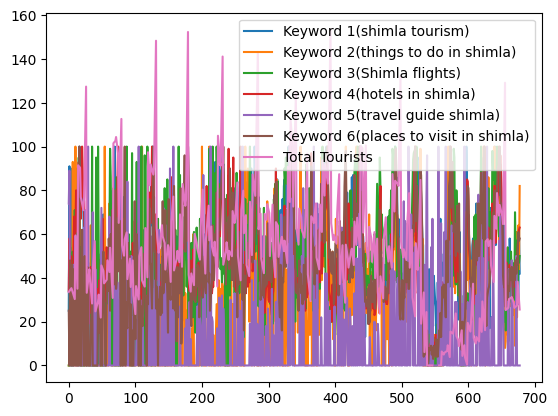

In [ ]:
trends_data_mod = trends_data.drop(['Total Tourists'], axis=1)
trends_data_mod['Total Tourists'] = trends_data['Total Tourists'] / 1000
trends_data_mod.plot()

In [ ]:
weekly_temp = pd.read_csv('weekly-temp.csv')
trends_data['Temperature'] = weekly_temp['0']
trends_data

,date,Keyword 1(shimla tourism),Keyword 2(things to do in shimla),Keyword 3(Shimla flights),Keyword 4(hotels in shimla),Keyword 5(travel guide shimla),Keyword 6(places to visit in shimla),Total Tourists,Temperature
0,2010-01-03,25,0,0,34,74,25,33605.0,15.0
1,2010-01-10,91,0,0,58,89,0,34034.0,14.0
2,2010-01-17,51,0,54,40,0,48,34462.0,14.0
3,2010-01-24,26,0,0,50,0,42,34891.0,13.0
4,2010-01-31,32,0,0,40,0,0,35319.0,12.0
...,...,...,...,...,...,...,...,...,...
673,2022-11-27,48,22,53,42,0,49,27411.0,24.0
674,2022-12-04,38,55,36,54,0,46,38257.0,14.0
675,2022-12-11,28,64,48,59,0,61,34027.0,16.0
676,2022-12-18,62,44,47,62,0,57,29798.0,18.0


In [ ]:
# trends_data.to_csv('Shimla_data.csv', index=False)

In [ ]:
from datetime import datetime

trends_data['Days'] = None

for i, date in enumerate(trends_data['date']):
  trends_data['Days'][i] = (datetime.strptime(date, "%Y-%m-%d") - datetime.strptime('2010-01-01', "%Y-%m-%d")).days

trends_data

<ipython-input-22-8d26eb8f74d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trends_data['Days'][i] = (datetime.strptime(date, "%Y-%m-%d") - datetime.strptime('2010-01-01', "%Y-%m-%d")).days


,date,Keyword 1(shimla tourism),Keyword 2(things to do in shimla),Keyword 3(Shimla flights),Keyword 4(hotels in shimla),Keyword 5(travel guide shimla),Keyword 6(places to visit in shimla),Total Tourists,Temperature,Days
0,2010-01-03,25,0,0,34,74,25,33605.0,15.0,2
1,2010-01-10,91,0,0,58,89,0,34034.0,14.0,9
2,2010-01-17,51,0,54,40,0,48,34462.0,14.0,16
3,2010-01-24,26,0,0,50,0,42,34891.0,13.0,23
4,2010-01-31,32,0,0,40,0,0,35319.0,12.0,30
...,...,...,...,...,...,...,...,...,...,...
673,2022-11-27,48,22,53,42,0,49,27411.0,24.0,4713
674,2022-12-04,38,55,36,54,0,46,38257.0,14.0,4720
675,2022-12-11,28,64,48,59,0,61,34027.0,16.0,4727
676,2022-12-18,62,44,47,62,0,57,29798.0,18.0,4734


In [ ]:
trends_data= pd.concat([trends_data.drop(['Total Tourists'], axis=1),trends_data['Total Tourists']], axis=1)
trends_data= pd.concat([trends_data['Days'], trends_data.drop(['Days'], axis=1)], axis=1)

trends_data

,Days,date,Keyword 1(shimla tourism),Keyword 2(things to do in shimla),Keyword 3(Shimla flights),Keyword 4(hotels in shimla),Keyword 5(travel guide shimla),Keyword 6(places to visit in shimla),Temperature,Total Tourists
0,2,2010-01-03,25,0,0,34,74,25,15.0,33605.0
1,9,2010-01-10,91,0,0,58,89,0,14.0,34034.0
2,16,2010-01-17,51,0,54,40,0,48,14.0,34462.0
3,23,2010-01-24,26,0,0,50,0,42,13.0,34891.0
4,30,2010-01-31,32,0,0,40,0,0,12.0,35319.0
...,...,...,...,...,...,...,...,...,...,...
673,4713,2022-11-27,48,22,53,42,0,49,24.0,27411.0
674,4720,2022-12-04,38,55,36,54,0,46,14.0,38257.0
675,4727,2022-12-11,28,64,48,59,0,61,16.0,34027.0
676,4734,2022-12-18,62,44,47,62,0,57,18.0,29798.0


In [ ]:
trends_data['Total Tourists'] = trends_data['Total Tourists'].bfill()

In [ ]:
trends_data.isna().sum()

Days                                    0
date                                    0
Keyword 1(shimla tourism)               0
Keyword 2(things to do in shimla)       0
Keyword 3(Shimla flights)               0
Keyword 4(hotels in shimla)             0
Keyword 5(travel guide shimla)          0
Keyword 6(places to visit in shimla)    0
Temperature                             0
Total Tourists                          0
dtype: int64

In [ ]:
ts = np.array(trends_data.drop(['date'], axis=1))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ts = scaler.fit_transform(ts)

# Create sequences for the LSTM model
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 104
X, y = create_sequences(ts, sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)

(459, 104, 9) (459, 9)


In [ ]:
import tensorflow as tf

def mse_tourist(y_pred, y):
  return tf.reduce_mean((y_pred - y) ** 2)

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.losses import MSE
from tensorflow.keras.metrics import RootMeanSquaredError, MeanSquaredError

model = Sequential()
model.add(LSTM(units=50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=X_train.shape[2]))

# Instantiate MeanSquaredError
mse_tourist_loss = MeanSquaredError()

# Compile the model using the custom loss and metrics
model.compile(optimizer='adam', loss=mse_tourist, metrics=[RootMeanSquaredError(), MeanSquaredError()])

In [144]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 50)                12000     
                                                                 
 dense_35 (Dense)            (None, 9)                 459       
                                                                 
Total params: 12459 (48.67 KB)
Trainable params: 12459 (48.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [145]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
15/15 [==============================] - 3s 48ms/step - loss: 0.1409 - root_mean_squared_error: 0.3753 - mean_squared_error: 0.1409
Epoch 2/50
15/15 [==============================] - 1s 44ms/step - loss: 0.0526 - root_mean_squared_error: 0.2294 - mean_squared_error: 0.0526
Epoch 3/50
15/15 [==============================] - 1s 45ms/step - loss: 0.0441 - root_mean_squared_error: 0.2101 - mean_squared_error: 0.0441
Epoch 4/50
15/15 [==============================] - 1s 44ms/step - loss: 0.0391 - root_mean_squared_error: 0.1978 - mean_squared_error: 0.0391
Epoch 5/50
15/15 [==============================] - 1s 42ms/step - loss: 0.0359 - root_mean_squared_error: 0.1894 - mean_squared_error: 0.0359
Epoch 6/50
15/15 [==============================] - 1s 78ms/step - loss: 0.0341 - root_mean_squared_error: 0.1848 - mean_squared_error: 0.0341
Epoch 7/50
15/15 [==============================] - 1s 75ms/step - loss: 0.0328 - root_mean_squared_error: 0.1812 - mean_squared_error: 0.0328